In [1]:
# Create a neural network from scratch using Python and NumPy to classify handwritten digits from the MNIST dataset.

In [2]:
import numpy as np
import pandas as pd
import os
import struct
import matplotlib.pyplot as plt
import random

In [ ]:
# ! pip install kaggle
# !kaggle datasets download -d oddrationale/mnist-in-csv

In [ ]:
# !unzip ./mnist-in-csv.zip

In [3]:
train = pd.read_csv("mnist_train.csv")
test = pd.read_csv("mnist_test.csv")

In [4]:
trainLabels = train['label']
trainImages = train.drop(['label'], axis=1)
testLabels = train['label']
testImages = train.drop(['label'], axis=1)

trainImages = np.array(trainImages)
testImages = np.array(testImages)
trainLabels = np.array(trainLabels)
testLabels = np.array(testLabels)
trainImages = trainImages.reshape(-1, 28, 28)
testImages = testImages.reshape(-1, 28, 28)

In [5]:
# Display an image from dataset
def displayImage(image, label=None):
    plt.imshow(image, cmap='gray')
    plt.title(f'Label: {label}')
    plt.axis('off')
    plt.show()

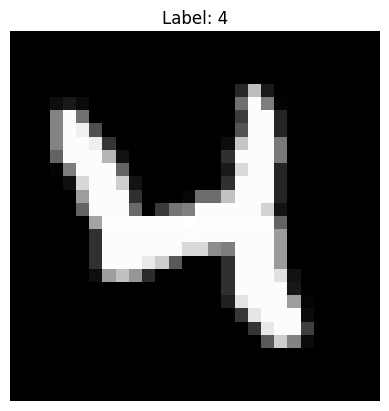

In [6]:
n = 20 # Any Image number
displayImage(trainImages[n], trainLabels[n])

In [7]:
# Split data into Train & Validation

rand=np.arange(60000)
np.random.shuffle(rand)
train_no=rand[:50000]

val_no=np.setdiff1d(rand,train_no)

trainImages, valImages = trainImages[train_no,:,:], trainImages[val_no,:,:]
trainLabels, valLabels = trainLabels[train_no], trainLabels[val_no]

trainImages.shape, valImages.shape

((50000, 28, 28), (10000, 28, 28))

In [8]:
# Our Neural Network consists of 3 layers:

class NeuralNetwork:
    def __init__(self, input_size, hidden_size1, hidden_size2, output_size):
        self.input_size = input_size
        self.hidden_size1 = hidden_size1
        self.hidden_size2 = hidden_size2
        self.output_size = output_size

        # Initialize weights
        self.W1 = np.random.randn(input_size, hidden_size1) * 0.01
        self.b1 = np.zeros((1, hidden_size1))
        self.W2 = np.random.randn(hidden_size1, hidden_size2) * 0.01
        self.b2 = np.zeros((1, hidden_size2))
        self.W3 = np.random.randn(hidden_size2, output_size) * 0.01
        self.b3 = np.zeros((1, output_size))

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def sigmoid_derivative(self, z):
        return z * (1 - z)

    def relu(self, z):
        return np.maximum(0, z)

    def relu_derivative(self, z):
        return (z > 0).astype(float)

    def softmax(self, z):
        exp_z = np.exp(z - np.max(z, axis=1, keepdims=True))
        return exp_z / np.sum(exp_z, axis=1, keepdims=True)

    def cross_entropy_loss(self, y_true, y_pred):
        m = y_true.shape[0]
        log_likelihood = -np.log(y_pred[np.arange(m), y_true])
        loss = np.sum(log_likelihood) / m
        return loss

    def forward(self, X):
        X = X.reshape(X.shape[0], -1)  # Flatten the input
        self.Z1 = np.dot(X, self.W1) + self.b1
        self.A1 = self.relu(self.Z1)
        self.Z2 = np.dot(self.A1, self.W2) + self.b2
        self.A2 = self.relu(self.Z2)
        self.Z3 = np.dot(self.A2, self.W3) + self.b3
        self.A3 = self.softmax(self.Z3)
        return self.A3

    def backward(self, X, y, output, learning_rate):
        X = X.reshape(X.shape[0], -1)  # Flatten the input
        m = X.shape[0]
        y_one_hot = np.zeros((m, self.output_size))
        y_one_hot[np.arange(m), y] = 1

        dZ3 = output - y_one_hot
        dW3 = np.dot(self.A2.T, dZ3) / m
        db3 = np.sum(dZ3, axis=0, keepdims=True) / m

        dA2 = np.dot(dZ3, self.W3.T)
        dZ2 = dA2 * self.relu_derivative(self.A2)
        dW2 = np.dot(self.A1.T, dZ2) / m
        db2 = np.sum(dZ2, axis=0, keepdims=True) / m

        dA1 = np.dot(dZ2, self.W2.T)
        dZ1 = dA1 * self.relu_derivative(self.A1)
        dW1 = np.dot(X.T, dZ1) / m
        db1 = np.sum(dZ1, axis=0, keepdims=True) / m

        # Update weights
        self.W1 -= learning_rate * dW1
        self.b1 -= learning_rate * db1
        self.W2 -= learning_rate * dW2
        self.b2 -= learning_rate * db2
        self.W3 -= learning_rate * dW3
        self.b3 -= learning_rate * db3

    def predict(self, X):
        output = self.forward(X)
        return np.argmax(output, axis=1)

In [13]:
# Hyperparameters
input_size = 784  # 28x28 pixels
hidden_size1 = 128
hidden_size2 = 64
output_size = 10  # 10 digits
learning_rate = 0.003
epochs = 250

acc = []
l = []

# Initialize the neural network
nn = NeuralNetwork(input_size, hidden_size1, hidden_size2, output_size)

# Training loop
for epoch in range(epochs):
    # Forward pass
    output = nn.forward(trainImages)

    # Compute loss
    loss = nn.cross_entropy_loss(trainLabels, output)

    # Backward pass
    nn.backward(trainImages, trainLabels, output, learning_rate)

    # Predict on the test set
    test_predictions = nn.predict(testImages)

    # Ensure that test_labels and test_predictions are numpy arrays
    test_labels = np.array(testLabels)
    test_predictions = np.array(test_predictions)

    # Calculate accuracy
    accuracy = np.mean(test_predictions == test_labels) * 100

    acc.append(accuracy)
    l.append(loss)

    print(f"Epoch {epoch + 1}/{epochs}, Training Loss: {loss:.4f} | Test accuracy: {accuracy:.2f}%")

    if accuracy > 95:
      break


Epoch 1/250, Training Loss: 2.3153 | Test accuracy: 7.20%
Epoch 2/250, Training Loss: 2.3058 | Test accuracy: 9.56%
Epoch 3/250, Training Loss: 2.2966 | Test accuracy: 12.52%
Epoch 4/250, Training Loss: 2.2876 | Test accuracy: 16.43%
Epoch 5/250, Training Loss: 2.2786 | Test accuracy: 20.92%
Epoch 6/250, Training Loss: 2.2696 | Test accuracy: 25.54%
Epoch 7/250, Training Loss: 2.2605 | Test accuracy: 29.62%
Epoch 8/250, Training Loss: 2.2512 | Test accuracy: 33.05%
Epoch 9/250, Training Loss: 2.2416 | Test accuracy: 35.85%
Epoch 10/250, Training Loss: 2.2316 | Test accuracy: 37.94%
Epoch 11/250, Training Loss: 2.2212 | Test accuracy: 39.58%
Epoch 12/250, Training Loss: 2.2103 | Test accuracy: 40.91%
Epoch 13/250, Training Loss: 2.1988 | Test accuracy: 41.93%
Epoch 14/250, Training Loss: 2.1867 | Test accuracy: 42.79%
Epoch 15/250, Training Loss: 2.1738 | Test accuracy: 43.53%
Epoch 16/250, Training Loss: 2.1602 | Test accuracy: 44.19%
Epoch 17/250, Training Loss: 2.1456 | Test accuracy

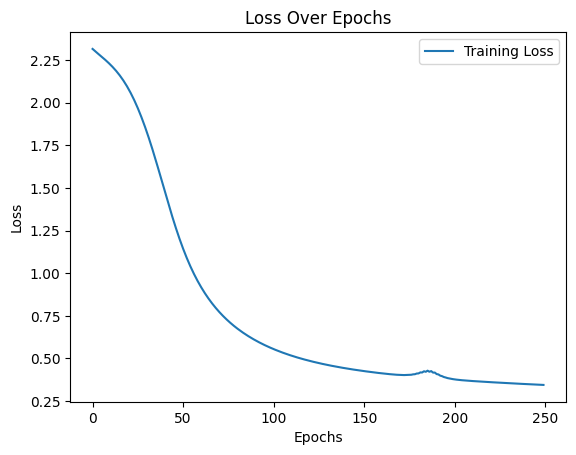

In [14]:
plt.plot(range(epochs), l, label='Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss Over Epochs')
plt.legend()
plt.show()

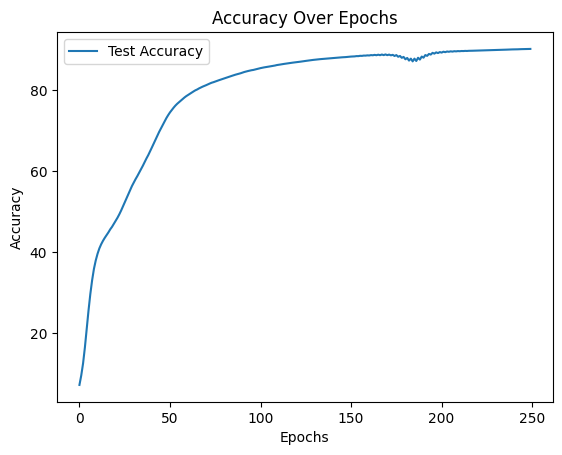

In [15]:
plt.plot(range(epochs), acc, label='Test Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy Over Epochs')
plt.legend()
plt.show()

In [17]:
print("Final Loss: ", l[-1])
print("Final Accuracy: ", acc[-1])

Final Loss:  0.34477623587756906
Final Accuracy:  90.14833333333333


Predicted Label: 5, Actual Label: 5


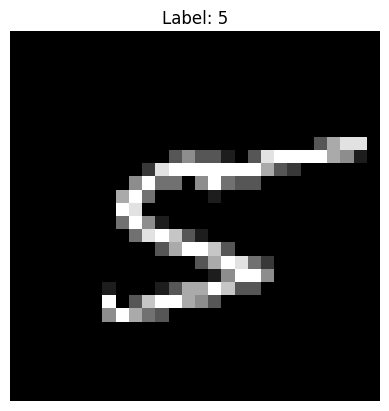

In [29]:
pred = nn.predict(valImages)
actual = np.array(valLabels)
n =  random.randint(0, 9999)

print(f"Predicted Label: {pred[n]}, Actual Label: {actual[n]}")
displayImage(valImages[n], pred[n])